In [2]:
import os 
import json 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
paths = [
    "trained_models/mlora-r4-a8-5e4-h4-epoch3",
    "trained_models/mlora-r4-a8-3e4-h4-epoch5",
    "trained_models/mlora-r4-a8-3e4-h8-epoch3"]
labels = ["HMLora-r4-h4-5e4-epoch3", "HMLora-r4-h4-3e4-epoch5", "HMLora-r4-h8-3e4-epoch3"]

In [4]:
loss_curves = {}
for path, label in zip(paths, labels):
    filenames = os.listdir(path)
    filenames = [f for f in filenames if f.startswith("checkpoint")]
    filename = f"checkpoint-{max([int(f.split('-')[1]) for f in filenames])}"
    with open(f"{path}/{filename}/trainer_state.json", "r") as f:
        trainer_state = json.load(f)
    loss_curves[label] = [item['eval_loss']  for item in trainer_state["log_history"] if 'eval_loss' in item]

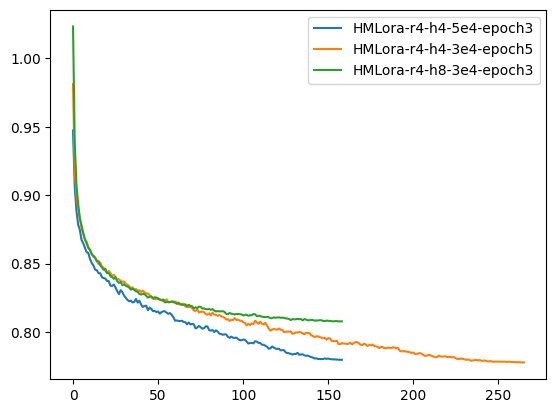

In [5]:
for label, loss_curve in loss_curves.items():
    plt.plot(np.arange(len(loss_curve)), loss_curve, label=label)
plt.legend()